In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import LabelEncoder

In [109]:
df = pd.read_csv('Transaction.csv', sep=';')
df.head()


,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [110]:
df1 = pd.read_csv('Store.csv', sep=';')
df1.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [111]:
df3 = pd.read_csv('Product.csv', sep=';')
df3.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [112]:
df4 = pd.read_csv('Customer.csv', sep=';')
df4.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


#### Merge data

In [113]:
merged = pd.merge(df, df4, on='CustomerID')
merged.head()


,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,36,0,Married,"10,53"
1,TR67395,328,22/01/2022,P8,16000,3,48000,11,36,0,Married,"10,53"
2,TR89012,328,25/03/2022,P5,4200,5,21000,6,36,0,Married,"10,53"
3,TR97172,328,21/05/2022,P1,8800,5,44000,1,36,0,Married,"10,53"
4,TR57013,328,15/09/2022,P7,9400,6,56400,1,36,0,Married,"10,53"


In [114]:
columns_to_drop = ['TransactionID', 'CustomerID', 'ProductID', 'ProductID', 'StoreID']  
merged_cleaned = merged.drop(columns=columns_to_drop)
merged_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            5020 non-null   object
 1   Price           5020 non-null   int64 
 2   Qty             5020 non-null   int64 
 3   TotalAmount     5020 non-null   int64 
 4   Age             5020 non-null   int64 
 5   Gender          5020 non-null   int64 
 6   Marital Status  4976 non-null   object
 7   Income          5020 non-null   object
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


#### Change data type

In [115]:
merged_cleaned['Date'] = pd.to_datetime(merged_cleaned['Date'],format='%d/%m/%Y')
merged_cleaned['Income'] = merged_cleaned['Income'].str.replace(',', '.').astype(float)
merged_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            5020 non-null   datetime64[ns]
 1   Price           5020 non-null   int64         
 2   Qty             5020 non-null   int64         
 3   TotalAmount     5020 non-null   int64         
 4   Age             5020 non-null   int64         
 5   Gender          5020 non-null   int64         
 6   Marital Status  4976 non-null   object        
 7   Income          5020 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 313.9+ KB


#### Clean data

In [116]:
merged_cleaned.isnull().sum()

Date               0
Price              0
Qty                0
TotalAmount        0
Age                0
Gender             0
Marital Status    44
Income             0
dtype: int64

In [117]:
merged_cleaned = merged_cleaned.dropna(subset=['Marital Status'])
merged_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4976 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            4976 non-null   datetime64[ns]
 1   Price           4976 non-null   int64         
 2   Qty             4976 non-null   int64         
 3   TotalAmount     4976 non-null   int64         
 4   Age             4976 non-null   int64         
 5   Gender          4976 non-null   int64         
 6   Marital Status  4976 non-null   object        
 7   Income          4976 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 349.9+ KB


In [118]:
Cat = ['Marital Status']
Num = ['Price', 'Qty', 'TotalAmount', 'Age', 'Gender', 'Income']
Timestamp = ['Date']

## EDA

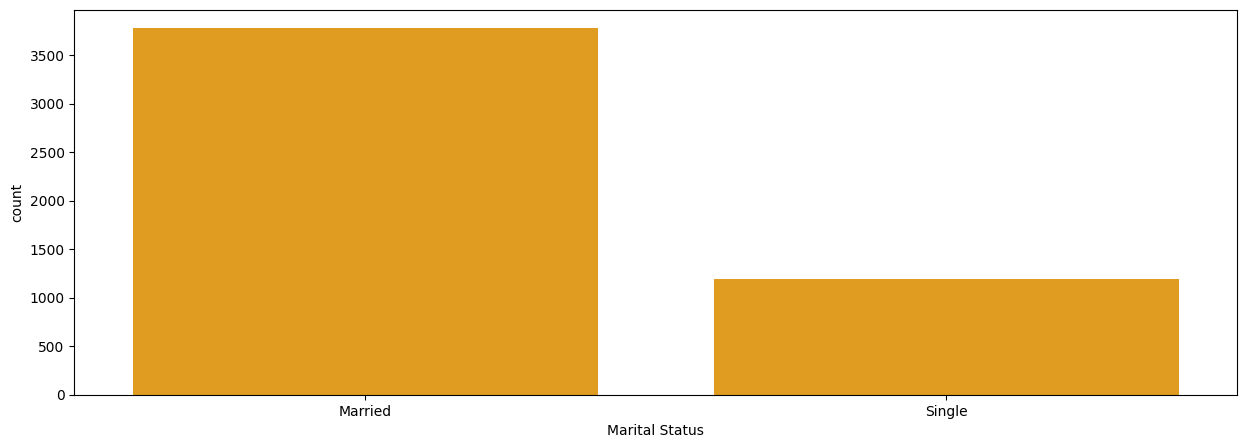

In [119]:
for i in range(len(Cat)):
    plt.figure(figsize=(15,5))
    sns.countplot(x=merged_cleaned[Cat[i]], data=df, color='orange')

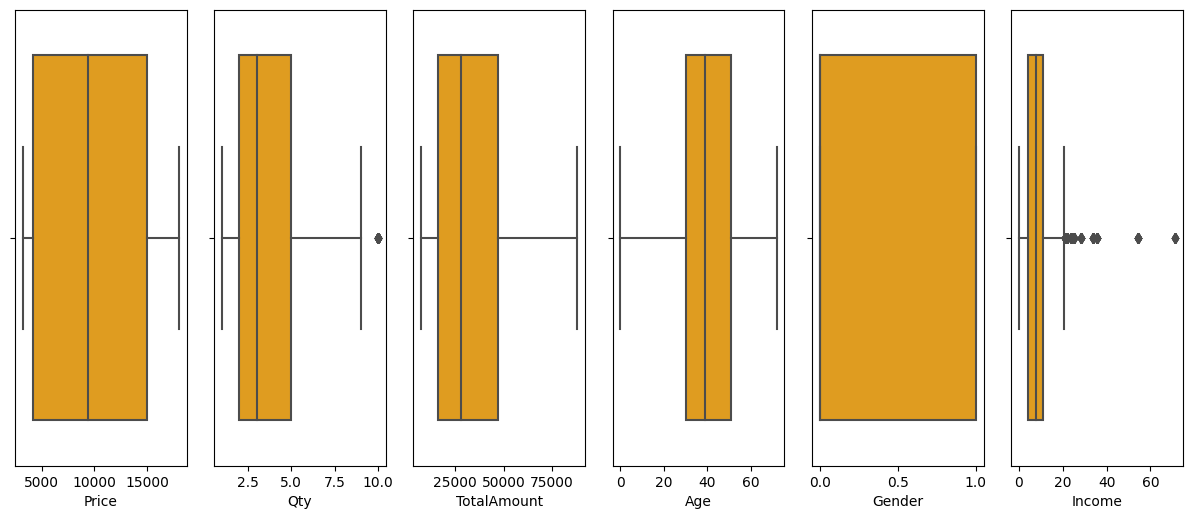

In [120]:
plt.figure(figsize=(20,10))

for i in range(0, len(Num)):
    plt.subplot(2, 10, i+1)
    sns.boxplot(x=merged_cleaned[Num[i]], color='orange', orient='h')
    plt.tight_layout()

plt.show()

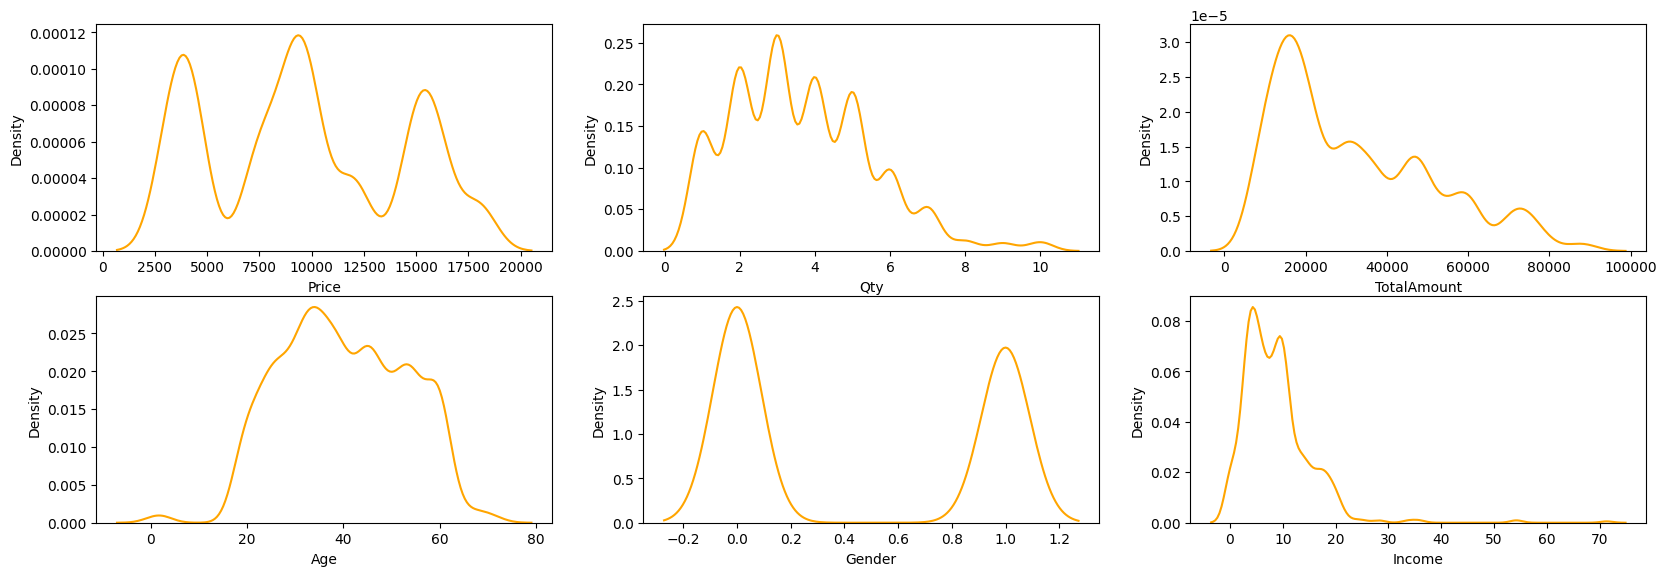

In [121]:
plt.figure(figsize=(20,10))
for i in range(len(Num)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=merged_cleaned[Num[i]], color='orange')

In [122]:
print(f'Number of rows before filtering outliers: {len(merged_cleaned)}')

filtered_entries = np.array([True] * len(merged_cleaned))
for col in Num:
    Q1 = merged_cleaned[col].quantile(0.25)
    Q3 = merged_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((merged_cleaned[col] >= low_limit) & (merged_cleaned[col] <= high_limit)) & filtered_entries

df = merged_cleaned[filtered_entries]

print(f'Number of rows after filtering outliers: {len(df)}')


Number of rows before filtering outliers: 4976
Number of rows after filtering outliers: 4818


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4818 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            4818 non-null   datetime64[ns]
 1   Price           4818 non-null   int64         
 2   Qty             4818 non-null   int64         
 3   TotalAmount     4818 non-null   int64         
 4   Age             4818 non-null   int64         
 5   Gender          4818 non-null   int64         
 6   Marital Status  4818 non-null   object        
 7   Income          4818 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 338.8+ KB


In [124]:

# List of categorical columns to be encoded
cats = ['Marital Status', 'Date']

# Create a copy of the DataFrame for encoding
df_encoded = df.copy()

# Perform categorical encoding using cat.codes
for i in cats:
    df_encoded[i] = df_encoded[i].astype('category').cat.codes

# Display the encoded DataFrame
print(df_encoded)

      Date  Price  Qty  TotalAmount  Age  Gender  Marital Status  Income
0        0   7500    4        30000   36       0               0   10.53
1       21  16000    3        48000   36       0               0   10.53
2       83   4200    5        21000   36       0               0   10.53
3      140   8800    5        44000   36       0               0   10.53
4      257   9400    6        56400   36       0               0   10.53
...    ...    ...  ...          ...  ...     ...             ...     ...
5015   222  12000    2        24000   19       0               1    2.66
5016   236  18000    1        18000   19       0               1    2.66
5017   247   4200    3        12600   19       0               1    2.66
5018   270   4200    3        12600   19       0               1    2.66
5019   358  12000    4        48000   19       0               1    2.66

[4818 rows x 8 columns]


In [125]:
df_encoded

,Date,Price,Qty,TotalAmount,Age,Gender,Marital Status,Income
0,0,7500,4,30000,36,0,0,10.53
1,21,16000,3,48000,36,0,0,10.53
2,83,4200,5,21000,36,0,0,10.53
3,140,8800,5,44000,36,0,0,10.53
4,257,9400,6,56400,36,0,0,10.53
...,...,...,...,...,...,...,...,...
5015,222,12000,2,24000,19,0,1,2.66
5016,236,18000,1,18000,19,0,1,2.66
5017,247,4200,3,12600,19,0,1,2.66
5018,270,4200,3,12600,19,0,1,2.66


In [126]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4818 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4818 non-null   int16  
 1   Price           4818 non-null   int64  
 2   Qty             4818 non-null   int64  
 3   TotalAmount     4818 non-null   int64  
 4   Age             4818 non-null   int64  
 5   Gender          4818 non-null   int64  
 6   Marital Status  4818 non-null   int8   
 7   Income          4818 non-null   float64
dtypes: float64(1), int16(1), int64(5), int8(1)
memory usage: 277.6 KB


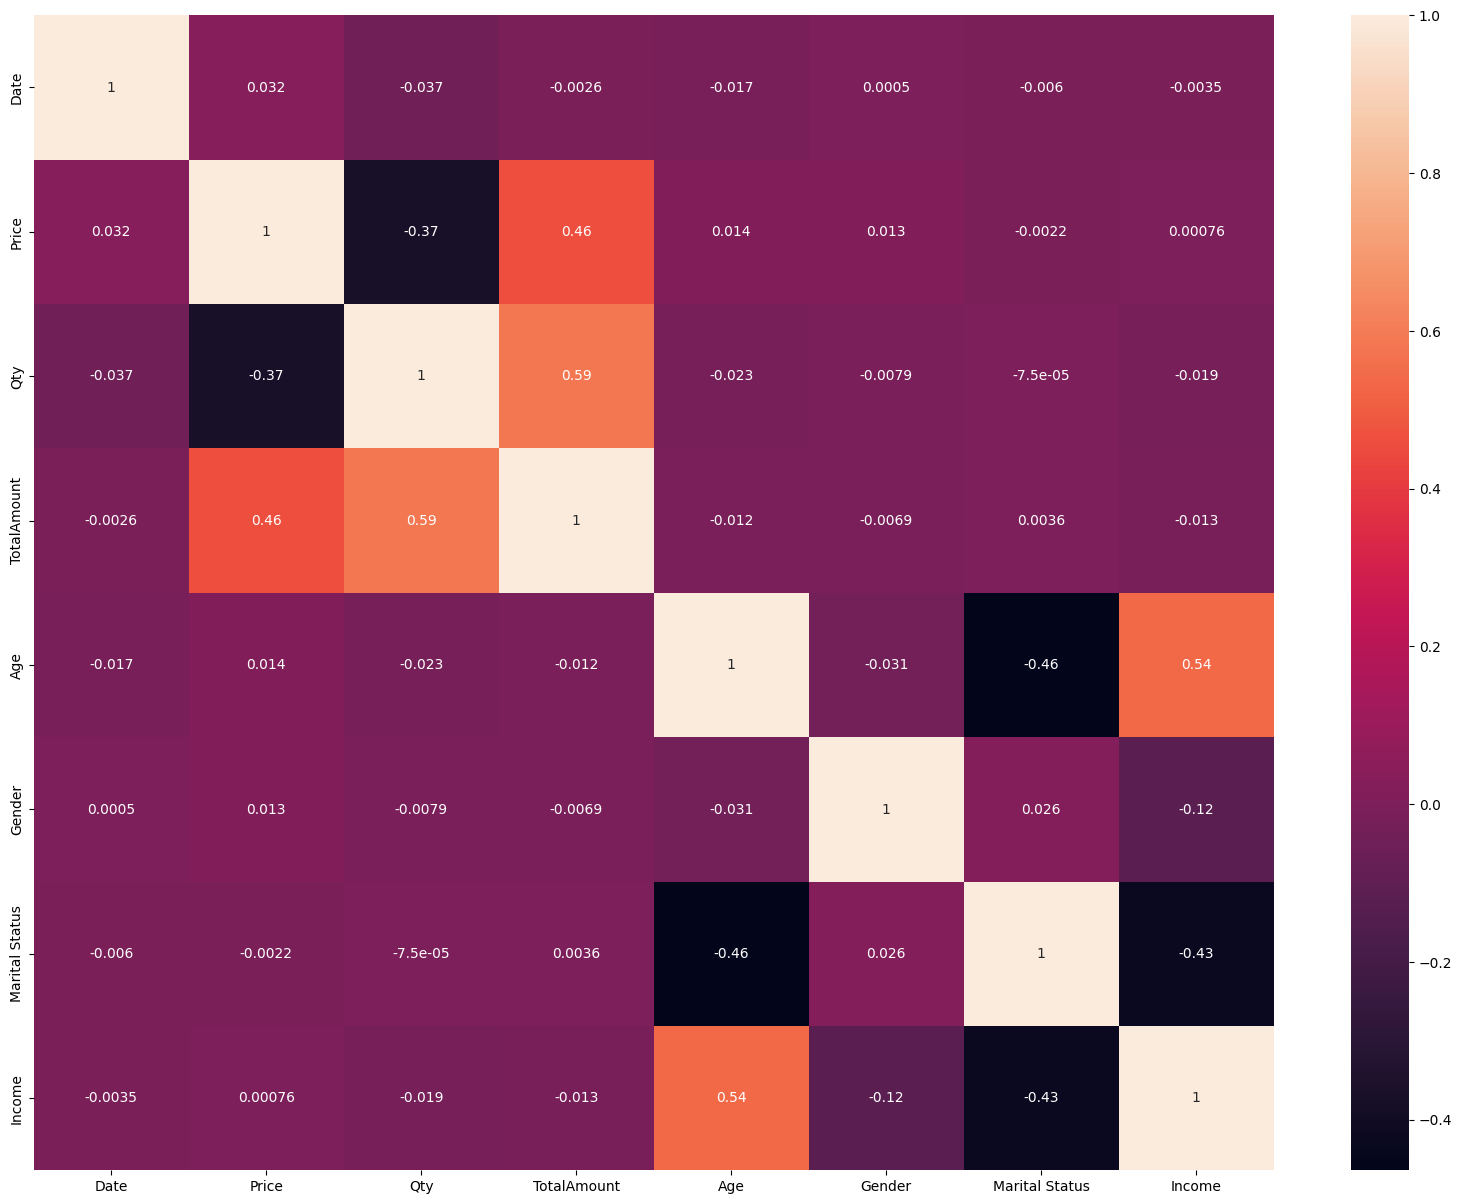

In [127]:
plt.subplots(figsize=(20,15))
sns.heatmap(df_encoded.corr(), annot=True)
plt.show()

In [128]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# List of features
features = ['Price', 'Qty', 'TotalAmount', 'Age', 'Gender', 'Income', 'Marital Status', 'Date']

# Assuming df_encoded is your encoded DataFrame
X = df_encoded.values

# Perform Min-Max scaling on the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with scaled features
df_scaled = pd.DataFrame(data=X_scaled, columns=features)

# Display summary statistics of the scaled DataFrame
print(df_scaled.describe())


             Price          Qty  TotalAmount          Age       Gender  \
count  4818.000000  4818.000000  4818.000000  4818.000000  4818.000000   
mean      0.492437     0.439332     0.324486     0.339898     0.553664   
std       0.290108     0.312270     0.220949     0.265932     0.179197   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.241758     0.067568     0.125000     0.118550     0.416667   
50%       0.483516     0.418919     0.250000     0.288703     0.541667   
75%       0.741758     0.797297     0.500000     0.550907     0.708333   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            Income  Marital Status         Date  
count  4818.000000     4818.000000  4818.000000  
mean      0.444998        0.238688     0.390572  
std       0.497017        0.426326     0.238419  
min       0.000000        0.000000     0.000000  
25%       0.000000        0.000000     0.202519  
50%       0.000000        0.00000

In [129]:
df_scaled

,Price,Qty,TotalAmount,Age,Gender,Income,Marital Status,Date
0,0.000000,0.290541,0.375,0.313808,0.500000,0.0,0.0,0.510174
1,0.057692,0.864865,0.250,0.564854,0.500000,0.0,0.0,0.510174
2,0.228022,0.067568,0.500,0.188285,0.500000,0.0,0.0,0.510174
3,0.384615,0.378378,0.500,0.509066,0.500000,0.0,0.0,0.510174
4,0.706044,0.418919,0.625,0.682008,0.500000,0.0,0.0,0.510174
...,...,...,...,...,...,...,...,...
4813,0.609890,0.594595,0.125,0.230126,0.263889,0.0,1.0,0.128876
4814,0.648352,1.000000,0.000,0.146444,0.263889,0.0,1.0,0.128876
4815,0.678571,0.067568,0.250,0.071130,0.263889,0.0,1.0,0.128876
4816,0.741758,0.067568,0.250,0.071130,0.263889,0.0,1.0,0.128876


In [130]:
# PCA
pcs = PCA(n_components=4).fit_transform(X_scaled)
df_pca = pd.DataFrame(data = pcs, columns = ['pc1','pc2','pc3','pc4'])
df_pca.describe()

,pc1,pc2,pc3,pc4
count,4.818000e+03,4.818000e+03,4.818000e+03,4.818000e+03
mean,-2.949534e-17,3.539441e-17,-2.433366e-17,9.217294e-18
std,4.998524e-01,4.503893e-01,3.532788e-01,3.007526e-01
min,-5.575640e-01,-5.567180e-01,-5.685453e-01,-7.123420e-01
25%,-4.789702e-01,-3.095389e-01,-3.946889e-01,-2.184771e-01
50%,-2.656371e-01,-1.818681e-01,1.556154e-02,-8.381885e-03
75%,4.984806e-01,-4.107251e-03,2.659565e-01,2.080237e-01
max,7.494830e-01,9.716936e-01,8.090171e-01,9.994753e-01


## Modeling Dan Evaluasi

#### Elbow method

In [131]:
inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_pca.values)
    inertia.append(kmeans.inertia_)

<Axes: >

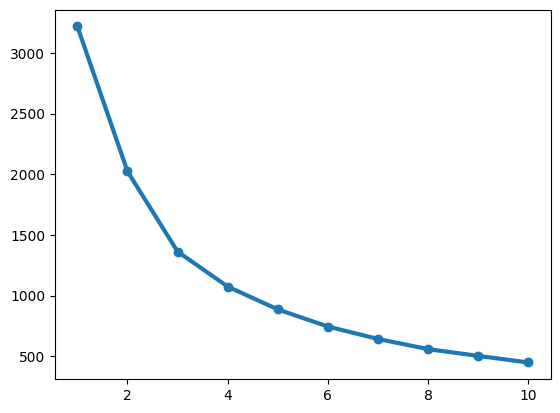

In [132]:
# visualization of the results of the elbow method
sns.lineplot(x=range(1,11), y=inertia, linewidth=3)
sns.scatterplot(x=range(1,11), y=inertia, s=60)

In [133]:
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    37.118213
1    32.664265
2    21.164675
3    17.526447
4    15.923113
5    13.734913
6    13.034631
7     9.977151
8    10.791462
9          NaN
dtype: float64

In [134]:
# fit model
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(df_pca.values)
df_pca['labels_cluster'] = kmeans.labels_

In [135]:
df_pca

,pc1,pc2,pc3,pc4,labels_cluster
0,-0.490222,-0.140252,-0.161894,0.270200,1
1,-0.482799,-0.144145,0.457689,0.110617,1
2,-0.493362,-0.139353,-0.405712,0.264272,1
3,-0.490059,-0.140212,0.040496,0.269237,1
4,-0.490471,-0.139709,0.187825,0.297906,1
...,...,...,...,...,...
4813,-0.247486,0.921273,0.080374,-0.301512,0
4814,-0.241487,0.916509,0.369996,-0.576385,0
4815,-0.254461,0.924929,-0.440938,-0.160618,0
4816,-0.254437,0.924683,-0.437370,-0.186773,0


<Axes: xlabel='pc1', ylabel='pc2'>

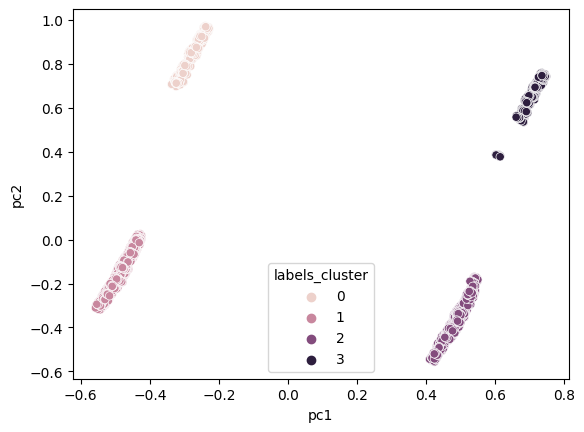

In [136]:
# visualization of clustering results
sns.scatterplot(data=df_pca, x='pc1', y='pc2', hue='labels_cluster')

In [137]:
# calculate the silhouette score
X_sil = df_pca.drop(columns='labels_cluster').values
labels = df_pca['labels_cluster'].values
silhouette_avg = silhouette_score(X_sil, labels)
silhouette_avg

0.4885377074478829

C:\Users\User\AppData\Local\Temp\ipykernel_2564\892589965.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(float(i) / n_clusters)


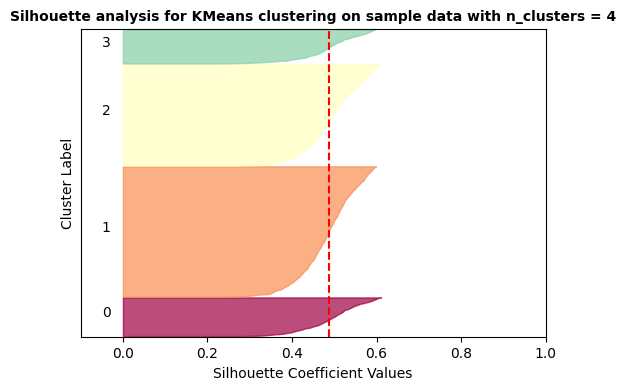

In [138]:
# silhouette score visualization
sample_silhouette_values = silhouette_samples(X_sil, labels)

n_clusters = 4
y_lower = 10
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(6, 4)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.get_cmap("Spectral")(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_xlabel("Silhouette Coefficient Values")
ax1.set_ylabel("Cluster Label")
ax1.set_yticks([])
plt.title(("Silhouette analysis for KMeans clustering on sample data "
               "with n_clusters = %d" % n_clusters),
              fontsize=10, fontweight='bold')
plt.show()

In [139]:

for col in Cat[1:]:
    codes = df_encoded[col].unique()
    labels = df_encoded[col].unique()
    mapping = dict(zip(codes, labels))
    df_encoded[col] = df_encoded[col].replace(mapping)

df_encoded['labels_cluster'] = kmeans.labels_
df_encoded.sample(5)

,Date,Price,Qty,TotalAmount,Age,Gender,Marital Status,Income,labels_cluster
1657,109,4200,4,16800,26,1,1,3.69,3
1346,83,16000,2,32000,57,0,0,7.81,1
2816,205,7500,3,22500,31,1,0,8.96,2
1632,43,10000,3,30000,21,1,1,3.64,3
2225,105,8800,8,70400,22,0,0,3.55,1


#### statistical summary

In [140]:
# numeric column

df_nums = df_encoded[Num]
df_nums['label'] = df_encoded['labels_cluster'].copy()

df_nums.groupby('label').agg(['mean', 'median', 'std'])


C:\Users\User\AppData\Local\Temp\ipykernel_2564\1096879231.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nums['label'] = df_encoded['labels_cluster'].copy()


Price                            Qty                   \
              mean  median          std      mean median       std   
label                                                                
0      9549.183007  9400.0  4544.824864  3.630719    3.0  1.731835   
1      9677.594568  9400.0  4632.107682  3.601843    3.0  1.766049   
2      9746.513076  9400.0  4581.543325  3.588418    3.0  1.784835   
3      9837.546468  9400.0  4791.100059  3.555762    3.0  1.766029   

        TotalAmount                               Age                    \
               mean   median           std       mean median        std   
label                                                                     
0      32279.738562  28200.0  19528.023791  30.166667   26.0  11.056543   
1      31901.842871  28200.0  18994.464489  43.205141   43.0  10.674356   
2      31741.967621  28200.0  18948.027152  43.233499   43.0  12.502048   
3      31670.260223  28200.0  19216.771082  28.029740   24.0  11.197027   

      Gender                Income                   
        mean median  std      mean median       std  
label                                                
0        0.0    0.0  0.0  5.088137  5.120  3.713956  
1        0.0    0.0  0.0  9.605238  9.475  5.010208  
2        1.0    1.0  0.0  8.764521  8.640  4.130032  
3        1.0    1.0  0.0  3.427602  3.280  3.462176

In [141]:
df_nums['label'] = df_encoded['labels_cluster']
result = df_nums.groupby('label').agg('first')

# Drop the 'Price' column from the result DataFrame
result_without_price = result.drop(columns=['Price'])

# Display the modified result DataFrame
print(result_without_price)


       Qty  TotalAmount  Age  Gender  Income
label                                       
0        4        48000   36       0    3.70
1        4        30000   36       0   10.53
2        7        70000   44       1   14.58
3        4        35200   27       1    0.18


C:\Users\User\AppData\Local\Temp\ipykernel_2564\398588985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nums['label'] = df_encoded['labels_cluster']


* Cluster 0 (label 0): Customers in this cluster tend to have a purchasing pattern with a moderate number of products (Qty) and a relatively low total expenditure (TotalAmount). The age of customers tends to be around 36 years old. All customers in this cluster are Female (Gender = 0), and the income of customers in this cluster is around 3.70.

* Cluster 1 (label 1): Customers in this cluster tend to have a purchasing pattern with a lower number of products (Qty), which results in a lower total expenditure (TotalAmount). The age of customers tends to be around 36 years old. All customers in this cluster are Female (Gender = 0), and the income of customers in this cluster is around 10.53.

* Cluster 2 (label 2): Customers in this cluster tend to have a purchase pattern with a high number of products (Qty), which results in a high total expenditure (TotalAmount). The age of customers tends to be older, around 44 years old. All customers in this cluster are Male (Gender=1), and the income of customers in this cluster is around 14.58.

* Cluster 3 (label 3): Customers in this cluster tend to have a pattern of purchasing a moderate number of products (Qty), which results in a relatively low total expenditure (TotalAmount). The age of customers tends to be younger, around 27 years old. All customers in this cluster are Male (Gender = 1), and the income of customers in this cluster is very low, only around 0.18.

### Businnes Recommendation:

* Cluster 0 (label 0):
Recommended: For this cluster, you can focus on offering mid-priced products that still provide good quality. Provide special offers or discounts to encourage further purchases.
Example: Create a mid-priced product package that includes several related products, and offer discounts to customers of this cluster.

* Cluster 1 (label 1):
Recommendation: Focus on lower-priced products to attract the attention of this cluster's customers. Offer regular discounts or purchase rewards to encourage more purchases.
Example: Create a loyalty program that gives discounts or rewards every time customers from this cluster shop.

* Cluster 2 (label 2):
Recommendations: Offer premium or luxury products that match the preferences of this cluster's customers. Provide an exclusive shopping experience and excellent customer service.
Example: Create an exclusive collection of products available only to customers of this cluster, and hold an exclusive event to launch it.

* Cluster 3 (label 3):
Recommendations: Focus on affordable products that meet the needs of customers from this cluster. Create flexible payment strategies to help those with low incomes.
Example: Offer installment payment options or membership programs that allow customers from this cluster to purchase products more easily.